This notebook is meant to show how one can slice (reduce one continuous symmetry of) a generic timeseries using the *first Fourier mode slice* (Budanur et. al. 2015, Phys. Rev. Lett. 114 (8)), **without** the template optimizations introduced in the paper this notebook accompanies (Marensi et. al. 2022, in preparation).

As an example we take a Gaussian that drifts -with a known drift velocity- and later splits to give two such Gaussians, a timeseries of the form
$G(x,t) = G_1(x,t) + G_2(x,t)$ such that
$$G_1(x-c_1 t) = A_1 e^{-(x-x_1 - c_1 t)^2} $$
and
$$G_2(x-c_2 t) = A_2 e^{-(x-x_2 - c_2 t)^2}\, \text{if}\, t > t_s\, \text{else}\, 0$$.


In [1]:
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
Nt = 50     # runtime
Nx = 80     # grid size
x0 = 20     # initial position of the parent puff
t_puff = 15 # when the child puff is born

c_parent = 1   # speed of the parent puff
c_child  = 2   # speed of the child puff
a_parent = 1   # amplitude of the parent puff
a_child  = 0.5 # amplitude of the child puff

Text(0, 0.5, 't')

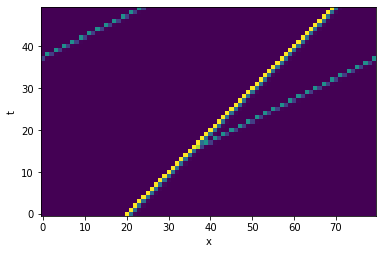

In [3]:
# create sample data
# drifting gaussians
puff = np.zeros((Nt, Nx))
for t in range(Nt):
    for x in range(Nx):
        puff[t, x] = a_parent*np.exp(- ((x - x0 - c_parent * t) % Nx) ** 2.0)
        if t > t_puff:
            puff[t, x] += a_child*np.exp(-((x - (x0 + c_parent * t_puff) - c_child * (t-t_puff))%Nx) ** 2.0)
    
fig, ax = plt.subplots()
ax.imshow(puff, origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('t')

Text(0, 0.5, 't')

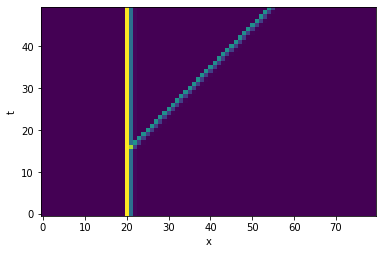

In [4]:
# perfect solution: 
# when one already knows the speed of the parent puff
puffStationary = np.zeros(puff.shape)
for t in range(Nt):
    for x in range(Nx):
        puffStationary[t, x] = puff[t, (x + c_parent * t) % Nx]
       
fig, ax = plt.subplots()
ax.imshow(puffStationary, origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('t')

Text(0, 0.5, 't')

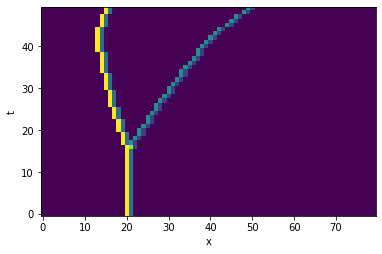

In [5]:
# standard slicing
template = np.cos(2 * np.pi * np.arange(0, Nx) / Nx)
templateShift = np.roll(template, int(Nx / 4))
proj_r = np.dot(puff, template)
proj_i = np.dot(puff, templateShift)
# phase at time zero
phase0 = np.arctan2(proj_i[0], proj_r[0])
# shift the origin back to the initial position of the parent puff
slicePhase = np.arctan2(proj_i, proj_r) - phase0
puffSlice = np.zeros(puff.shape)
for i in range(puffSlice.shape[0]):
    puffSlice[i, :] = np.roll(puff[i, :], -int(np.round(Nx * slicePhase[i] / (2 * np.pi))))

fig, ax = plt.subplots()
ax.imshow(puffSlice, origin='lower')
ax.set_xlabel('x')
ax.set_ylabel('t')